In [21]:
#!pip install torchvision
from torch import utils
from torchvision import datasets, transforms
t = transforms.ToTensor()
# Load datasets for training and testing.
mnist_training = datasets.MNIST(root='/tmp/mnist', train=True, download=True, transform=t)
mnist_val = datasets.MNIST(root='/tmp/mnist', train=False, download=True, transform=t)

In [22]:
display(mnist_training)
display(mnist_val)

Dataset MNIST
    Number of datapoints: 60000
    Root location: /tmp/mnist
    Split: Train
    StandardTransform
Transform: ToTensor()

Dataset MNIST
    Number of datapoints: 10000
    Root location: /tmp/mnist
    Split: Test
    StandardTransform
Transform: ToTensor()

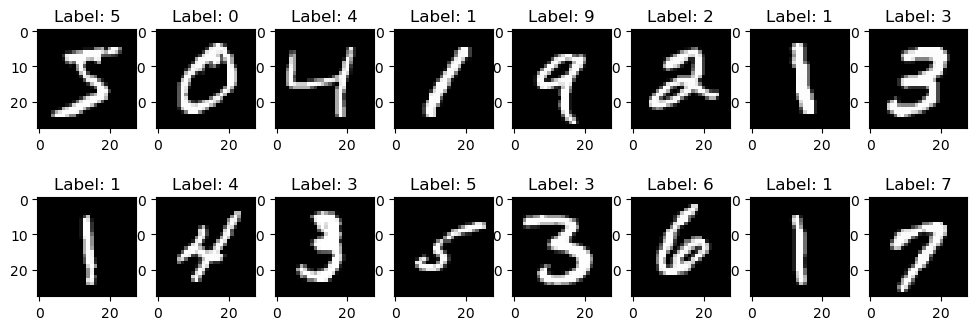

In [23]:
# Plot some digits.
import matplotlib.pyplot as plt
cols = 8
rows = 2
fig, axes = plt.subplots(nrows = rows, ncols = cols, figsize=(1.5*cols, 2*rows))
for i, ax in enumerate(axes.flatten()):
    image, label = mnist_training[i]
    ax.set_title(f"Label: {label}")
    ax.imshow(image.squeeze(0), cmap = 'gray')
plt.show()

In [24]:
import torch
# Create a simple neural network with one hidden layer with 256 neurons.
model = torch.nn.Sequential(
    torch.nn.Linear(28*28, 256), # Images are into 28*28 form, 
    torch.nn.ReLU(),
    torch.nn.Linear(256, 10)  # Our "output" layer needs 10 neurons because We have 10 classes.
)
# Use Adam as optimizer.
opt = torch.optim.Adam(params=model.parameters(), lr=0.01)

# Use CrossEntropyLoss for as loss function.
loss_fn = torch.nn.CrossEntropyLoss()

# We train the model with batches of 500 examples.
batch_size = 500
train_loader = torch.utils.data.DataLoader(mnist_training, batch_size=batch_size, shuffle=True)

In [25]:
# Training of the model. We use 10 epochs.
losses = []

for epoch in range(10):
    for imgs, labels in train_loader:
        n = len(imgs)
        # Reshape data from [500, 1, 28, 28] to [500, 784] and use the model to make predictions.
        predictions = model(imgs.view(n, -1))
        # Compute the loss.
        loss = loss_fn(predictions, labels) 
        opt.zero_grad()
        loss.backward()
        opt.step()
        losses.append(float(loss))
    print(f"Epoch: {epoch}, Loss: {float(loss)}")

Epoch: 0, Loss: 0.12309780716896057
Epoch: 1, Loss: 0.10174328833818436
Epoch: 2, Loss: 0.11442330479621887
Epoch: 3, Loss: 0.05854590982198715
Epoch: 4, Loss: 0.030393553897738457
Epoch: 5, Loss: 0.03355295956134796
Epoch: 6, Loss: 0.038160957396030426
Epoch: 7, Loss: 0.035627853125333786
Epoch: 8, Loss: 0.024519003927707672
Epoch: 9, Loss: 0.024300765246152878


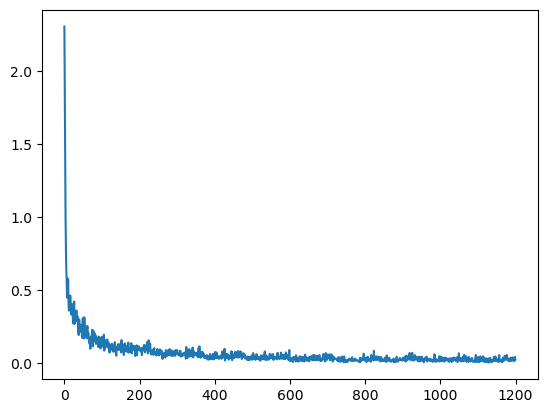

In [26]:
#plotting loss/ learning curve
plt.plot(losses)

In [29]:
# Load all 10000 images from the testing set.
n = 10000
loader = torch.utils.data.DataLoader(mnist_val, batch_size=n, num_workers=2)
images, labels = next(iter(loader))
data = images.view(n, -1)
predictions = model(data)
predicted_classes = torch.argmax(predictions, dim = 1)

# For Accuracy
sum(predicted_classes.numpy() == labels.numpy()) / n

0.9769

Predicted Digit = 7
Actual Image:


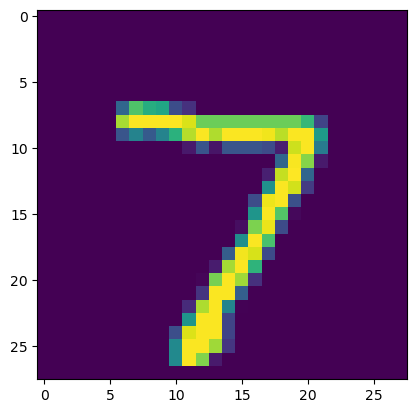

In [78]:
img = images[0].view(1, 784)
with torch.no_grad():
    logps = model(img)

ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
print("Actual Image:")
plt.imshow (img.view (1, 784).reshape (28, 28))
